# EV charging data in Palo alto California

# EDA for the dataset

In [1]:
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import time

In [2]:
df_ori = pd.read_csv("data/EVChargingStationUsage.csv",low_memory= False) 
df = pd.read_csv("data/EVChargingStationUsage.csv",low_memory= False)


In [3]:
df.shape

(259415, 33)

In [4]:
df.head(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [5]:
df.tail(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW
259414,PALO ALTO CA / CAMBRIDGE #4,0024:B100:0003:3A0A,City of Palo Alto,12/31/2020 18:19,PST,12/31/2020 19:01,PST,12/31/2020 19:02,0:42:07,0:41:44,...,-122.146034,USD,0.36,Plug Out at Vehicle,2302,94305.0,2022651,Santa Clara County,1.852410e+11,CT4020-HD-GW


In [6]:
df.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443911e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483968e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.020000e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.707410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [8]:
# Checking missing values
print(df.isnull().sum())

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [9]:
print(df.dtypes)

Station Name                        object
MAC Address                         object
Org Name                            object
Start Date                          object
Start Time Zone                     object
End Date                            object
End Time Zone                       object
Transaction Date (Pacific Time)     object
Total Duration (hh:mm:ss)           object
Charging Time (hh:mm:ss)            object
Energy (kWh)                       float64
GHG Savings (kg)                   float64
Gasoline Savings (gallons)         float64
Port Type                           object
Port Number                          int64
Plug Type                           object
EVSE ID                            float64
Address 1                           object
City                                object
State/Province                      object
Postal Code                          int64
Country                             object
Latitude                           float64
Longitude  

In [10]:
# removing the unwanted columns
df = df.drop(columns=["EVSE ID", "System S/N", "Model Number", "County"])
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,94301,United States,37.444572,-122.160309,USD,0.00,Customer,4,94301.0,4169
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,94301,United States,37.444572,-122.160309,USD,0.00,Customer,6,94302.0,2545
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,94306,United States,37.428623,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,94301,United States,37.448284,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,94303,United States,37.422104,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,94301,United States,37.448284,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075


In [11]:
df.shape

(259415, 29)

In [12]:
# handling the missing values in the categorical variables 
df.loc[:, "Port Type"] = df["Port Type"].fillna(df["Port Type"].mode()[0])
df.loc[:, "Currency"] = df["Currency"].fillna(df["Currency"].mode()[0])
df.loc[:, "Ended By"] = df["Ended By"].fillna(df["Ended By"].mode()[0])
df.loc[:, "User ID"] = df["User ID"].fillna("Unknown")


In [13]:
# handling numerical missing values 
df.loc[:,"Driver Postal Code"] = df["Driver Postal Code"].fillna(df["Driver Postal Code"].median())


In [14]:
# handling missing dates 
#df.loc[:,"Transaction Date (Pacific Time)"] = 
df = df.dropna(subset=["Transaction Date (Pacific Time)"])

In [15]:
df.isnull().sum()

Station Name                       0
MAC Address                        0
Org Name                           0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended By                           0
Plug In Event Id                   0
D

In [16]:
print(df["Start Date"].apply(type).value_counts())


Start Date
<class 'str'>    259206
Name: count, dtype: int64


In [17]:
# Convert Dates & Time for Time-Series Analysis

def convert_to_datetime(value):
    """Convert Excel serial numbers & strings to datetime"""
    try:
        return pd.to_datetime(value, format="%m/%d/%Y %H:%M")  # Normal date parsing
    except ValueError:
        try:
            return pd.to_datetime("1899-12-30") + pd.to_timedelta(float(value), unit="D")  # Convert Excel serial date
        except:
            return pd.NaT  # If it fails, return NaT (missing value)

df.loc[:,"Start Date"] = df["Start Date"].astype(str).apply(convert_to_datetime)
df.loc[:,"End Date"] = df["End Date"].astype(str).apply(convert_to_datetime)


In [18]:
print(df["Start Date"].apply(type).value_counts())


Start Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    259206
Name: count, dtype: int64


In [19]:
print(df["Start Date"].isna().sum(), "missing values after conversion")
print(df["End Date"].isna().sum(), "missing values after conversion")


0 missing values after conversion
0 missing values after conversion


In [20]:
print(df['Start Date'].dtype)


object


In [21]:
df.loc[:, 'Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', format="%m/%d/%Y %H:%M")


In [22]:
print(df['Start Date'].dtype)


object


In [25]:
df.loc[:, 'Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')


In [27]:
# creating a deep copy
df = df.copy()

df.loc[:, 'start_hour'] = df['Start Date'].dt.hour
df.loc[:, 'start_dayofweek'] = df['Start Date'].dt.dayofweek
df.loc[:, 'start_month'] = df['Start Date'].dt.month
df.loc[:, 'start_year'] = df['Start Date'].dt.year



In [28]:
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,start_hour,start_dayofweek,start_month,start_year
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,USD,0.00,Plug Out at Vehicle,3,95124.0,3284,20,4,7,2011
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,USD,0.00,Customer,4,94301.0,4169,0,5,7,2011
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,USD,0.00,Plug Out at Vehicle,5,94301.0,4169,8,5,7,2011
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,USD,0.00,Customer,6,94302.0,2545,14,5,7,2011
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,USD,0.00,Plug Out at Vehicle,7,94043.0,3765,18,5,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,12/31/2020 17:16,0:35:44,0:35:18,...,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,16,3,12,2020
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,12/31/2020 20:32,3:43:01,2:14:04,...,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,16,3,12,2020
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,1/1/2021 10:57,17:28:14,5:08:12,...,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,17,3,12,2020
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,12/31/2020 21:56,4:05:34,3:53:42,...,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,17,3,12,2020


In [29]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'start_hour',
       'start_dayofweek', 'start_month', 'start_year'],
      dtype='object')

In [30]:
# converting duration to minutes or seconds 
def convert_duration_to_minutes(duration):
    if pd.isna(duration):
        return 0  # Handle missing values
    h, m, s = map(int, duration.split(':'))  # Split the time
    return h * 60 + m + s / 60  # Convert to minutes

df.loc[:,'total_duration_mins'] = df['Total Duration (hh:mm:ss)'].apply(convert_duration_to_minutes)
df.loc[:,'charging_time_mins'] = df['Charging Time (hh:mm:ss)'].apply(convert_duration_to_minutes)

In [31]:
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Ended By,Plug In Event Id,Driver Postal Code,User ID,start_hour,start_dayofweek,start_month,start_year,total_duration_mins,charging_time_mins
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,Plug Out at Vehicle,3,95124.0,3284,20,4,7,2011,183.533333,114.050000
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,Customer,4,94301.0,4169,0,5,7,2011,2.100000,1.900000
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,Plug Out at Vehicle,5,94301.0,4169,8,5,7,2011,257.533333,257.466667
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,Customer,6,94302.0,2545,14,5,7,2011,123.400000,122.966667
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,Plug Out at Vehicle,7,94043.0,3765,18,5,7,2011,71.400000,43.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,12/31/2020 17:16,0:35:44,0:35:18,...,Plug Out at Vehicle,2369,94301.0,2024201,16,3,12,2020,35.733333,35.300000
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,12/31/2020 20:32,3:43:01,2:14:04,...,Plug Out at Vehicle,7255,94541.0,242661,16,3,12,2020,223.016667,134.066667
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,1/1/2021 10:57,17:28:14,5:08:12,...,Plug Out at Vehicle,455,94306.0,449995,17,3,12,2020,1048.233333,308.200000
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,12/31/2020 21:56,4:05:34,3:53:42,...,Plug Out at Vehicle,7256,94552.0,804075,17,3,12,2020,245.566667,233.700000


In [32]:
# removing the columns total duration and charging time since they're converted and stored into different column
df = df.copy()  # Create a new copy to avoid the warning

# Now you can safely drop the columns
df.drop(['Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)'], axis=1, inplace=True)

In [33]:
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Energy (kWh),GHG Savings (kg),...,Ended By,Plug In Event Id,Driver Postal Code,User ID,start_hour,start_dayofweek,start_month,start_year,total_duration_mins,charging_time_mins
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,7/29/2011 23:20,6.249457,2.625,...,Plug Out at Vehicle,3,95124.0,3284,20,4,7,2011,183.533333,114.050000
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,7/30/2011 0:02,0.106588,0.045,...,Customer,4,94301.0,4169,0,5,7,2011,2.100000,1.900000
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,7/30/2011 12:34,14.951777,6.280,...,Plug Out at Vehicle,5,94301.0,4169,8,5,7,2011,257.533333,257.466667
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,7/30/2011 16:55,7.159643,3.007,...,Customer,6,94302.0,2545,14,5,7,2011,123.400000,122.966667
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,7/30/2011 20:03,1.957765,0.822,...,Plug Out at Vehicle,7,94043.0,3765,18,5,7,2011,71.400000,43.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,12/31/2020 17:16,1.841000,0.773,...,Plug Out at Vehicle,2369,94301.0,2024201,16,3,12,2020,35.733333,35.300000
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,12/31/2020 20:32,12.744000,5.352,...,Plug Out at Vehicle,7255,94541.0,242661,16,3,12,2020,223.016667,134.066667
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,1/1/2021 10:57,29.665000,12.459,...,Plug Out at Vehicle,455,94306.0,449995,17,3,12,2020,1048.233333,308.200000
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,12/31/2020 21:56,11.976000,5.030,...,Plug Out at Vehicle,7256,94552.0,804075,17,3,12,2020,245.566667,233.700000


# Encoding categorical variables 

In [34]:
# encoding categorical variables
'''
Port Type
Plug Type
City
State/Province
Country
Ended By
'''

# One-Hot Encoding for categorical variables with limited unique values
df = pd.get_dummies(df, columns=['Port Type', 'Plug Type', 'Ended By'], drop_first=True)

# Label Encoding for High Cardinality Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['City', 'State/Province', 'Country']:
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
# dropping the unnecessary columns

df.drop(['MAC Address', 'Org Name', 'Start Time Zone', 'End Time Zone', 
         'Transaction Date (Pacific Time)', 'Driver Postal Code', 'User ID'], axis=1, inplace=True)

In [36]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 259206 entries, 0 to 259414
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Station Name                           259206 non-null  object        
 1   Start Date                             259206 non-null  datetime64[ns]
 2   End Date                               259206 non-null  object        
 3   Energy (kWh)                           259206 non-null  float64       
 4   GHG Savings (kg)                       259206 non-null  float64       
 5   Gasoline Savings (gallons)             259206 non-null  float64       
 6   Port Number                            259206 non-null  int64         
 7   Address 1                              259206 non-null  object        
 8   City                                   259206 non-null  int64         
 9   State/Province                         259206 non-nul

# Exploratory Data Analysis

In [37]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


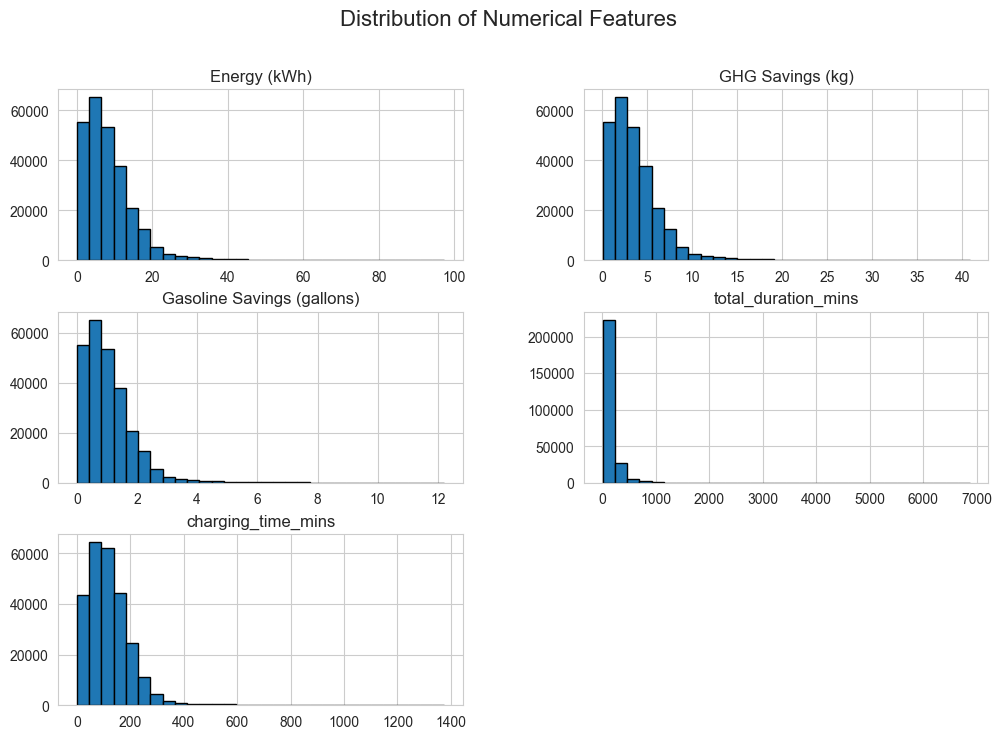

In [38]:
# distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Select numerical columns
num_cols = ['Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'total_duration_mins', 'charging_time_mins']

# Plot histograms
df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

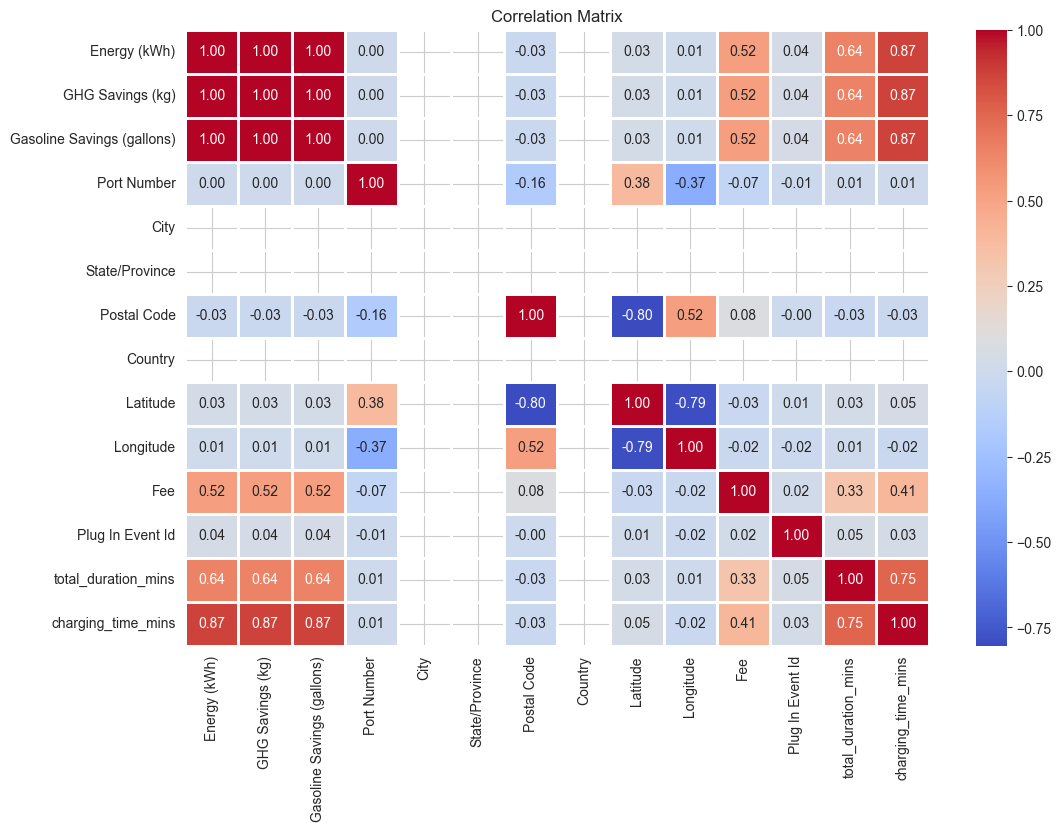

In [39]:
# checking for correlation features
# filtering only the numeric columns for correlation matrix


import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Matrix")
plt.show()


# Data preprocessing and model training 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the target variable and features
X = df.drop('Energy (kWh)', axis=1)  # Drop the target variable column
y = df['Energy (kWh)']  # Target variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numeric values
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine both transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing pipeline to data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



In [ ]:
'''# training a random forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = numeric_cols.tolist() + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()'''


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train_processed, y_train)